In [5]:
pip install cv2


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [4]:
import tensorflow as tf
import random
import numpy as np
import os
import imageio
import cv2
from PIL import Image
import pickle

ModuleNotFoundError: No module named 'cv2'

In [2]:
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'keras'

In [5]:
seed = 42
np.random.seed = seed

In [6]:
img_width =  256
img_height = 256
img_channel = 3
total_count_images = 780

In [7]:
train_path = '/content/drive/MyDrive/Breast ultrasound' 

In [8]:
train_id = next(os.walk(train_path))[1]

In [9]:
X_train = np.zeros((total_count_images, img_height, img_width, img_channel), dtype = np.int8)
y_train = np.zeros((total_count_images, img_height, img_width, 1), dtype = np.int8)

In [10]:
X_train[1, 1, :3]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [11]:
y_train[1, 1, :3]

array([[0],
       [0],
       [0]], dtype=int8)

In [12]:
X_train.shape

(780, 256, 256, 3)

In [13]:
y_train.shape

(780, 256, 256, 1)

In [14]:
x_index = 0
y_index = 0
folder_dir = train_path + '/' 

for i in tqdm(sorted(os.listdir(folder_dir + train_id[0]))):
  for j in sorted(os.listdir(folder_dir + train_id[0] + '/' + i)):
    img = imread(folder_dir + train_id[0] + '/' + i + '/' + j)[:,:,:img_channel]  
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[x_index] = img
    x_index += 1

for l in sorted(os.listdir(folder_dir + train_id[1])):
  for m in sorted(os.listdir(folder_dir + train_id[1] + '/' + l)):
    img = imread(folder_dir + train_id[1] + '/' + l + '/' + m) 
    img = resize(img, (img_height, img_width,1), mode='constant', preserve_range=True)
    y_train[y_index] = img
    y_index += 1

y_train = (y_train > 0.5)

100%|██████████| 3/3 [00:40<00:00, 13.59s/it]


In [15]:
inputs = tf.keras.layers.Input((img_height, img_width, img_channel))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [16]:
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c5)
p5 = tf.keras.layers.MaxPooling2D((2, 2))(c5)

# ----------------------------------------------------

u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides = (2, 2), padding = 'same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides = (2, 2), padding = 'same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides = (2, 2), padding = 'same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides = (2, 2), padding = 'same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1])
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', kernel_initializer = 'he_normal', padding = 'same')(c9)

# ----------------------------------------------------

output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c9)

model = tf.keras.Model(inputs = [inputs], outputs = [output])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [17]:
result = model.fit(X_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
49/49 [==============================] - 22s 185ms/step - loss: 0.0719 - accuracy: 0.9756
Epoch 2/100
49/49 [==============================] - 7s 141ms/step - loss: 0.0200 - accuracy: 0.9972
Epoch 3/100
49/49 [==============================] - 7s 141ms/step - loss: 0.0189 - accuracy: 0.9972
Epoch 4/100
49/49 [==============================] - 7s 142ms/step - loss: 0.0185 - accuracy: 0.9972
Epoch 5/100
49/49 [==============================] - 7s 143ms/step - loss: 0.0176 - accuracy: 0.9972
Epoch 6/100
49/49 [==============================] - 7s 144ms/step - loss: 0.0172 - accuracy: 0.9972
Epoch 7/100
49/49 [==============================] - 7s 144ms/step - loss: 0.0169 - accuracy: 0.9972
Epoch 8/100
49/49 [==============================] - 7s 145ms/step - loss: 0.0167 - accuracy: 0.9972
Epoch 9/100
49/49 [==============================] - 7s 146ms/step - loss: 0.0162 - accuracy: 0.9972
Epoch 10/100
49/49 [==============================] - 7s 148ms/step - loss: 0.0161 - accur

In [18]:
idx = random.randint(0, len(X_train))

In [19]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
# preds_test = model.predict(X_test, verbose=1)

3/3 [==============================] - 1s 543ms/step


In [20]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
# preds_test_t = (preds_test > 0.5).astype(np.uint8)

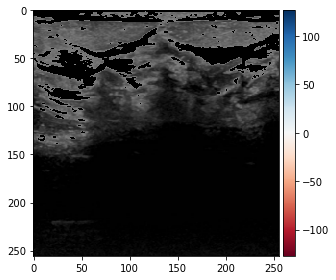

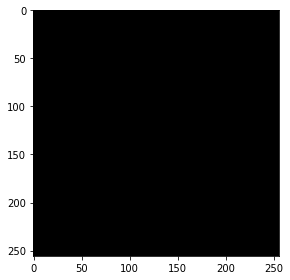

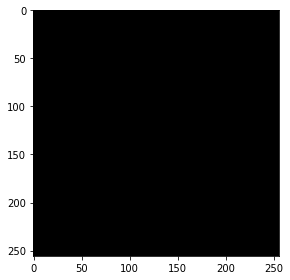

In [21]:
# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

In [22]:
from tensorflow.python.ops.gen_array_ops import reshape
img = imread('/content/drive/MyDrive/Breast ultrasound/X/malignant/malignant (103).png')[:,:,:img_channel]  
img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
img = reshape(img, (1, img_height, img_width, img_channel))
pred_1 = model.predict(img, verbose = 1)


1/1 [==============================] - 1s 682ms/step


You have tumour, consult a doctor


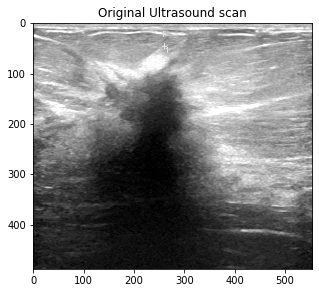

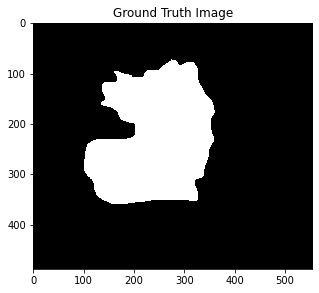

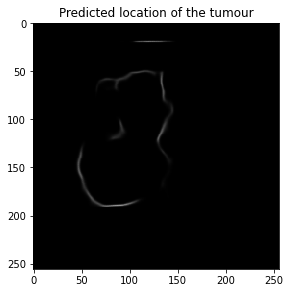

In [42]:
temp3 = (pred_1 > 0.5)
if True in temp3:
  print("You have tumour, consult a doctor")
  imshow('/content/drive/MyDrive/Breast ultrasound/X/malignant/malignant (103).png')
  plt.title("Original Ultrasound scan")
  plt.show()
  imshow('/content/drive/MyDrive/Breast ultrasound/y/malignant/malignant (103)_mask.png')
  plt.title("Ground Truth Image")
  plt.show()
  imshow(np.squeeze(pred_1))
  plt.title("Predicted location of the tumour")
  plt.show()
else:
  print("You don't have cancer.")

True


In [25]:
#image from the internet
from tensorflow.python.ops.gen_array_ops import reshape
img = cv2.imread('/content/brst-us-cyst.jpg')[:,:,:3] 
img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
img = reshape(img, (1, img_height, img_width, img_channel))
pred_2 = model.predict(img, verbose = 1)


1/1 [==============================] - 0s 24ms/step


You have cancer, consult a a doctor


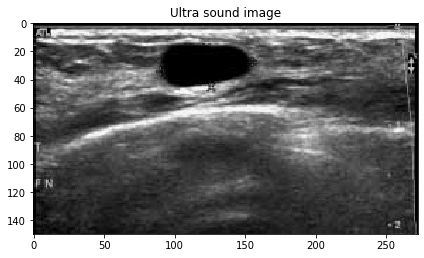

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


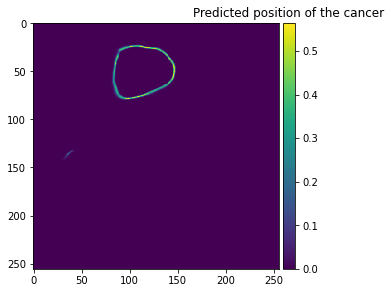

In [44]:
temp2 = (pred_2 > 0.5)
if True in temp2:
  print("You have cancer, consult a a doctor")
  imshow('/content/brst-us-cyst.jpg')
  plt.title("Ultra sound image")
  plt.show()
  imshow(np.squeeze(pred_2))
  plt.title("Predicted position of the cancer")
  plt.show()
else:
  print("You dont have cancer")

True


In [28]:
#image from the internet
from tensorflow.python.ops.gen_array_ops import reshape
img = cv2.imread('/content/A318601_1_En_3_Fig3_HTML.jpg')[:,:,:3] 
img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
img = reshape(img, (1, img_height, img_width, img_channel))
pred_3 = model.predict(img, verbose = 1)


1/1 [==============================] - 0s 22ms/step


In [45]:
temp = (pred_3 > 0.5)
if True in temp:
  print("You have cancer, consult a doctor")
  imshow('/content/A318601_1_En_3_Fig3_HTML.jpg')
  plt.title("Ultrasound image")
  plt.show()
  imshow(np.squeeze(pred_3))
  plt.title("Predicted position of the image")
  plt.show()
else:
  print("You dont have cancer")

You dont have cancer


In [35]:
temp = (pred_3 > 0.5)
print(True in temp)

False
